# Examples of usage

In [1]:
import logging

In [2]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [3]:
from core import WMFileSource, PythonSource, MaxToMin, GreedyTranspOne, GreedyTranspMany, PartialSolution
from algorithm import (
    GurobiSolver, GreedySolver, KarmarkarKarp,
    SimulatedAnnealing, temperature_div_log, temperature_div,
)

# Small Instance

In [4]:
data_s = PythonSource(
    data=[8, 6, 7, 4, 5],
    mapper=float,
    gatherer=list,
)
m_s = 3

## Gurobi

In [5]:
gurobi_s = GurobiSolver().solve(data_s.get_data(), m_s)
gurobi_s

Set parameter Username
Academic license - for non-commercial use only - expires 2022-01-27
Set parameter TimeLimit to value 300
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 15 columns and 15 nonzeros
Model fingerprint: 0x255c147a
Model has 45 quadratic objective terms
Variable types: 0 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+01, 2e+02]
  QObjective range [3e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 600.0000000
Presolve time: 0.00s
Presolved: 35 rows, 45 columns, 105 nonzeros
Variable types: 0 continuous, 45 integer (45 binary)

Root relaxation: objective -1.100000e+02, 11 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | 

Statistics for partial solution 140131026647504.
IS_FULL:True
SETS:
7.0 4.0
6.0 5.0
8.0
MSE: 6.0

## Greedy Algorithm

In [6]:
greedy_s = GreedySolver().solve(data_s.get_data(), m_s)
greedy_s

Statistics for partial solution 140129930670960.
IS_FULL:True
SETS:
8.0
7.0 4.0
6.0 5.0
MSE: 6.0

## Karmarkar-Karp

In [7]:
kk_s = KarmarkarKarp().solve(data_s.get_data(), m=m_s)
kk_s

Statistics for partial solution 140129930672448.
IS_FULL:True
SETS:
8.0
4.0 7.0
5.0 6.0
MSE: 6.0

## Simulated Annealing

In [20]:
sa_s = SimulatedAnnealing(
    PartialSolution.from_solution([[8, 7, 4, 6, 5], [], []]),
    move=GreedyTranspOne,
    temperature_func=temperature_div,
    t_max=10**6,
    t_min=10**-12,
    max_iter=10**2,
).solve(
    [8, 7, 4, 6, 5],
    3,
)
sa_s


Statistics for partial solution 140129890405776.
IS_FULL:True
SETS:
4 6
8
7 5
MSE: 8.0

In [23]:
sa_s = SimulatedAnnealing(
    PartialSolution.from_solution([[8, 7, 4, 6, 5], [], []]),
    move=MaxToMin,
    temperature_func=temperature_div,
    t_max=10**6,
    t_min=10**-12,
    max_iter=10**2,
).solve(
    [8, 7, 4, 6, 5],
    3,
)
sa_s


Statistics for partial solution 140129890376480.
IS_FULL:True
SETS:
8
6 5
7 4
MSE: 6.0

# Larger instance

In [24]:
data_l = WMFileSource(
    filepath='instances/data.wm',
    mapper=int,
    gatherer=list,
)
m_l = 20

## Gurobi

In [26]:
gurobi_l = GurobiSolver(timelimit=5).solve(data_l.get_data(), m_l)
gurobi_l


Set parameter TimeLimit to value 5
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 235 rows, 4700 columns and 4700 nonzeros
Model fingerprint: 0x51d76d99
Model has 554600 quadratic objective terms
Variable types: 0 continuous, 4700 integer (4700 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+09, 8e+11]
  QObjective range [3e+06, 6e+11]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Found heuristic solution: objective 4.241330e+14
Presolve time: 0.10s
Presolved: 235 rows, 4700 columns, 4700 nonzeros
Presolved model has 554600 quadratic objective terms
Variable types: 0 continuous, 4700 integer (4700 binary)
Found heuristic solution: objective 3.120287e+13

Root relaxation: objective 0.000000e+00, 2580 iterations, 

Statistics for partial solution 140129890183920.
IS_FULL:True
SETS:
80539 4830 23181 50152 46999 50579 25811 56643 46912 52350 24611 27707 49158 25623 5999 52164 51893 6415 13030 10360 11812 49418 25873 25408 9152 23523 5968 51914 50472 47239 49526
53662 67749 63754 206707 16959 270015 31435 28470 11501 14485 34194 45839 68027 9948 66449 65415
23256 282977 56716 23080 69933 79350 78406 81724 78134 228372 26308 29092
8993 22890 20440 40264 208596 260107 37140 28756 20176 44229 84438 283620
1471 38206 85270 30807 4967 63483 240554 271928 20981 30137 7314 62852 86717 22893 87100
86687 57954 67680 66543 63333 49046 297393 89859 38230 71789 76620 88870
60486 19311 6276 21309 74335 35133 45268 293515 34940 18793 27698 314306 44558 57889
1933 7059 1302 30247 51051 60230 254474 234039 298160 44446 71640
88151 92414 45821 11015 53692 45444 33906 3606 46232 83809 201347 86551 262574
89243 264621 30733 240534 210543 219218
96607 94830 17355 98472 97302 10588 92820 35129 330057 81049 26581 39093 3

## Greedy Algorithm

In [27]:
greedy_l = GreedySolver().solve(data_l.get_data(), m_l)
greedy_l

Statistics for partial solution 140129890373888.
IS_FULL:True
SETS:
23256 69547 30247 45444 51051 387162 89243 81049 60230 16676 201347
375698 21309 89859 50152 206707 81724 18793 38229 37140 71640 65415
19311 372906 49903 65893 38206 90314 38230 20440 208596 70866 82469
88151 40868 1933 49046 23080 95292 1302 357826 14485 71789 34194 68027 210543
80539 53662 211791 46912 55712 27698 6415 26581 99148 9948 88870 349541
8993 346671 7059 56643 27707 52539 78372 27196 86760 98418 47239 219218
92616 73494 34999 16959 228372 87745 40264 49418 22385 342797 66449
92018 339311 30807 3606 59258 84625 234039 23523 51914 44558 78777 14191
66543 35133 69933 339195 25408 9152 83809 39093 7314 49526 240534 91393
57954 5979 52350 78406 28470 85270 26308 330057 10360 240554 94676 46232
67680 252972 47520 11015 90727 45268 24611 327670 83002 5968 70270 30137
22890 4519 67749 72297 34940 49158 13030 314306 254474 95204 87578 40391
15822 50601 74335 23181 1471 63754 92820 87539 260107 44446 30733 311060
3

## Karmarkar-Karp

In [28]:
kk_l = KarmarkarKarp().solve(data_l.get_data(), m=m_l)
kk_l


Statistics for partial solution 140129887643056.
IS_FULL:True
SETS:
25623 40391 34940 80457 55712 311060 260107 92820 87539 50472 16676
45444 72297 65415 30137 53662 293515 279671 92359 83946 22890 11501 4967
45268 74335 63483 30247 297393 271928 94830 87100 51893 22385 16959
46232 69547 68027 28470 372906 208596 90314 82469 49418 23523 10360 5999
26308 38230 37140 79350 56643 342797 228372 92616 87745 50322 9948 6415
46912 70866 66543 28215 375698 206707 89859 81724 49526 23256 11812 4830
38229 38206 78777 56716 24948 339311 234039 92018 84625 52539 10588 5979
26581 39175 35129 76620 60230 357826 210543 95292 88151 49903 10373 6276
25873 41794 33906 80539 55124 303036 262574 98472 87268 50579 15515 1502
46999 78134 59258 27707 387162 201347 89243 81049 47520 20440 17355
25408 40264 34999 78406 57889 298160 270015 96607 86551 51051 11015 5968
25811 40868 34194 78372 57954 289260 282977 92414 86687 50601 15822 1471
45839 69933 67749 28756 327670 252972 90727 83002 49158 24611 8993 7059


## Simulated Annealing

In [38]:
sa_l = SimulatedAnnealing(
    greedy_l,
    move=GreedyTranspOne,
    temperature_func=temperature_div,
    t_max=10**6,
    t_min=10**-12,
    max_iter=10**2,
).solve(
    data_l.get_data(),
    m=m_l,
)
sa_l


Statistics for partial solution 140129887240928.
IS_FULL:True
SETS:
23256 69547 30247 45444 51051 387162 89243 81049 60230 16676 201347
375698 21309 89859 50152 206707 81724 18793 38229 37140 71640 65415
19311 372906 49903 65893 38206 90314 38230 20440 208596 70866 82469
88151 40868 1933 49046 23080 95292 1302 357826 14485 71789 34194 68027 210543
80539 53662 211791 46912 55712 27698 6415 26581 99148 9948 88870 349541
8993 346671 7059 56643 27707 52539 78372 27196 86760 98418 47239 219218
92616 73494 34999 16959 228372 87745 40264 49418 22385 342797 66449
92018 339311 30807 3606 59258 84625 234039 23523 51914 44558 78777 14191
66543 35133 69933 339195 25408 9152 83809 39093 7314 49526 240534 91393
57954 5979 52350 78406 28470 85270 26308 330057 10360 240554 94676 46232
67680 252972 47520 11015 90727 45268 24611 327670 83002 5968 70270 30137
22890 4519 67749 72297 34940 49158 13030 314306 254474 95204 87578 40391
15822 50601 74335 23181 1471 63754 92820 87539 260107 44446 30733 311060
3

## Tabu Search

## Ant Colony Optimization


## Genetic Algorithms

# Benchmarking

In [12]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
df = pd.DataFrame(
    [
        ["Exact", Appraiser(gurobi_s).of, Appraiser(gurobi_l).of],
        ["Greedy", Appraiser(greedy_s).of, Appraiser(greedy_l).of],
        ["KarmarkarKarp", Appraiser(kk_s).of, Appraiser(kk_l).of],
    ],
    columns=['Algorithm', "RMSE (small)", "RMSE (large)"]
)
df

,Algorithm,RMSE (small),RMSE (large)
0,Exact,2.44949,11306.033168
1,Greedy,2.44949,2759.019391
2,KarmarkarKarp,2.44949,3074.449869


<AxesSubplot:xlabel='Algorithm'>

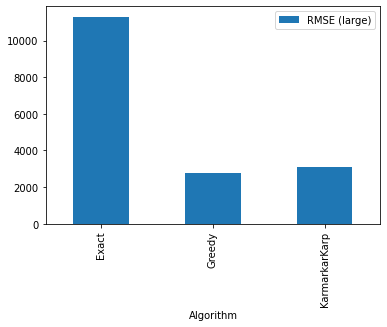

In [24]:

df[["Algorithm", "RMSE (large)"]].set_index("Algorithm").plot.bar()